## Prediction of Default Credit Cards-Part 1

## Content

1.**Data Cleaning**-<br>
a) Removing the unwanted Columns<br>
b) Renaming the columns<br>
c) Checking and removing the null and duplicates values.<br>
d)

2.Label Encoding for categorical columns<br>
3.Data Visualization and Analysis<br>
4.Handling the Imbalance target column<br>
5.Standardisation for logistic regression model<br>
6.Creating models and comparing the logistic and random model accuracy.<br>
7.Feature selection and rerunning the model<br>

**I have divided this Project into two parts.**
1) Part 1- Data cleaning, exploration and visualization.<br>
2) Part 2- Model Building, Algorithm selection and Prediction of card defaults<br>

In [1]:
# Reading the dataset

path <- "https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Default%20of%20Credit%20Card%20Clients/default%20of%20credit%20card%20clients.csv"
data <- read.csv(file = path, header = TRUE)
head(data,10)

X,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [2]:
# Removing the ID column

colnames(data) <- as.character(unlist(data[1,]))
data = data[-1, ]

In [3]:
# Renaming the target column that is default payment

colnames(data)[colnames(data)=="default payment next month"] <- "default_payment"

In [4]:
str(data)

'data.frame':	30000 obs. of  25 variables:
 $ ID             : Factor w/ 30001 levels "1","10","100",..: 1 11112 22223 23335 24446 25557 26668 27779 28890 2 ...
 $ LIMIT_BAL      : Factor w/ 82 levels "10000","100000",..: 14 5 81 48 48 48 49 2 7 14 ...
 $ SEX            : Factor w/ 3 levels "1","2","SEX": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION      : Factor w/ 8 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE       : Factor w/ 5 levels "0","1","2","3",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE            : Factor w/ 57 levels "21","22","23",..: 4 6 14 17 37 17 9 3 8 15 ...
 $ PAY_0          : Factor w/ 12 levels "-1","-2","0",..: 5 1 3 3 1 3 3 3 3 2 ...
 $ PAY_2          : Factor w/ 12 levels "-1","-2","0",..: 5 5 3 3 3 3 3 1 3 2 ...
 $ PAY_3          : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 1 3 3 1 5 2 ...
 $ PAY_4          : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ PAY_5          : Factor w/ 11 levels "-1","-2","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ PA

In [5]:
##converting character to numerical data type 

data[, 1:25] <- sapply(data[, 1:25], as.character)  
data[, 1:25] <- sapply(data[, 1:25], as.numeric)

In [6]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [7]:
dim(data)
str(data)

[1] 30000    25

'data.frame':	30000 obs. of  25 variables:
 $ ID             : num  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL      : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX            : num  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION      : num  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE       : num  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE            : num  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0          : num  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2          : num  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3          : num  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4          : num  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5          : num  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6          : num  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1      : num  3913 2682 29239 46990 8617 ...
 $ BILL_AMT2      : num  3102 1725 14027 48233 5670 ...
 $ BILL_AMT3      : num  689 2682 13559 49291 35835 ...
 $ BILL_AMT4      : num  0 3272 14331 28314 20940 ...
 $ BILL_AMT5      : num  0 3455 14948 28959 19146 ...
 $ BILL_AMT6      : nu

In [8]:
## Checking the null values

In [9]:
colSums(is.na(data))

ID       LIMIT_BAL             SEX       EDUCATION        MARRIAGE 
              0               0               0               0               0 
            AGE           PAY_0           PAY_2           PAY_3           PAY_4 
              0               0               0               0               0 
          PAY_5           PAY_6       BILL_AMT1       BILL_AMT2       BILL_AMT3 
              0               0               0               0               0 
      BILL_AMT4       BILL_AMT5       BILL_AMT6        PAY_AMT1        PAY_AMT2 
              0               0               0               0               0 
       PAY_AMT3        PAY_AMT4        PAY_AMT5        PAY_AMT6 default_payment 
              0               0               0               0               0

In [10]:
## Remove the duplicates value if there are any

dim(data)
data <- data[!duplicated(data),]

[1] 30000    25

In [11]:
data %>% count(EDUCATION)
data %>% count(MARRIAGE)

EDUCATION,n
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


MARRIAGE,n
0,54
1,13659
2,15964
3,323


In [12]:
### As there are very less count of 5 and 6 in the education column and 0 in the marriage column and also 5 and 6 has not been specify in the given information about the datasets. Therefore we will merge them with the above category

In [13]:
data$EDUCATION[data$EDUCATION == 0] <- 4
data$EDUCATION[data$EDUCATION == 5] <- 4
data$EDUCATION[data$EDUCATION == 6] <- 4
data$MARRIAGE[data$MARRIAGE == 0] <- 3

In [14]:
data %>% count(EDUCATION)
data %>% count(MARRIAGE)

EDUCATION,n
1,10585
2,14030
3,4917
4,468


MARRIAGE,n
1,13659
2,15964
3,377


In [15]:
## Removing the ID column

data1 <- data[-1]

In [16]:
### Checking the Dataset after tranformation

head(data1,10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
2,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
3,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
8,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
9,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
10,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
11,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [17]:
colnames(data1)

[1] "LIMIT_BAL"       "SEX"             "EDUCATION"       "MARRIAGE"       
 [5] "AGE"             "PAY_0"           "PAY_2"           "PAY_3"          
 [9] "PAY_4"           "PAY_5"           "PAY_6"           "BILL_AMT1"      
[13] "BILL_AMT2"       "BILL_AMT3"       "BILL_AMT4"       "BILL_AMT5"      
[17] "BILL_AMT6"       "PAY_AMT1"        "PAY_AMT2"        "PAY_AMT3"       
[21] "PAY_AMT4"        "PAY_AMT5"        "PAY_AMT6"        "default_payment"

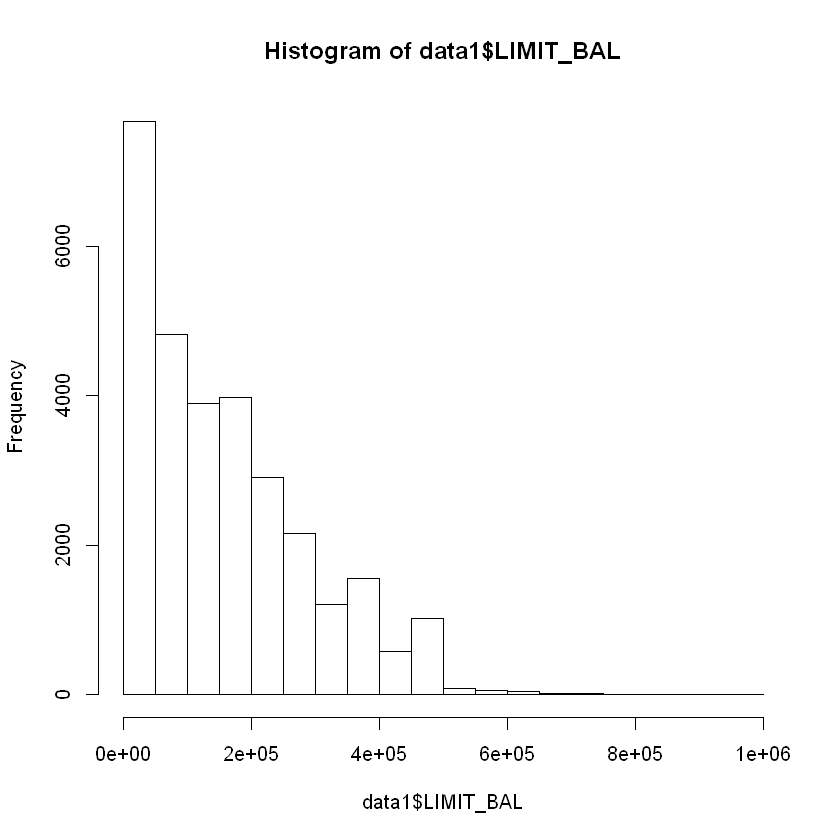

In [18]:
hist(data1$LIMIT_BAL)  #positively skewed

### From the above graph we can say that, limit balance column is positively skewed. Therefore there are some extreme values present in it. 

In [20]:
## identifying outliers

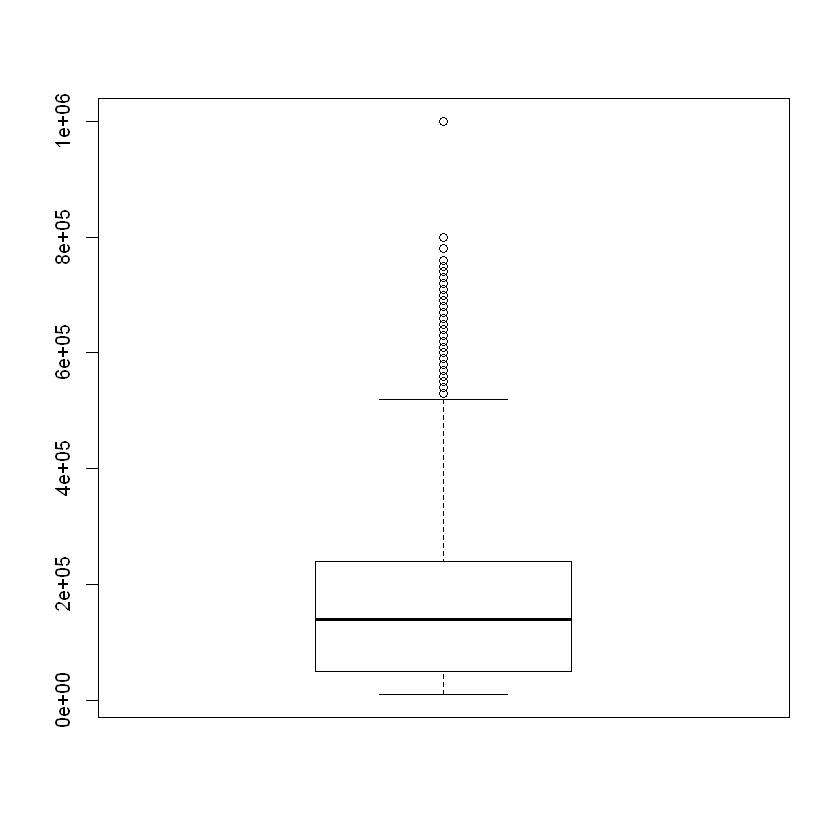

In [21]:
boxplot(data1$LIMIT_BAL)

In [22]:
#remove the last observations from the dataset

library(tidyverse)

In [23]:
p <- filter(data1,LIMIT_BAL>900000)
print(p)
p <- NA

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1     1e+06   2         1        1  47     0     0     0    -1     0     0
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
1    964511    983931    535020    891586    927171    961664    50784    50723
  PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 default_payment
1   896040    50000    50000    50256               0


In [24]:
data2<-subset(data1, LIMIT_BAL!=1e+06 )

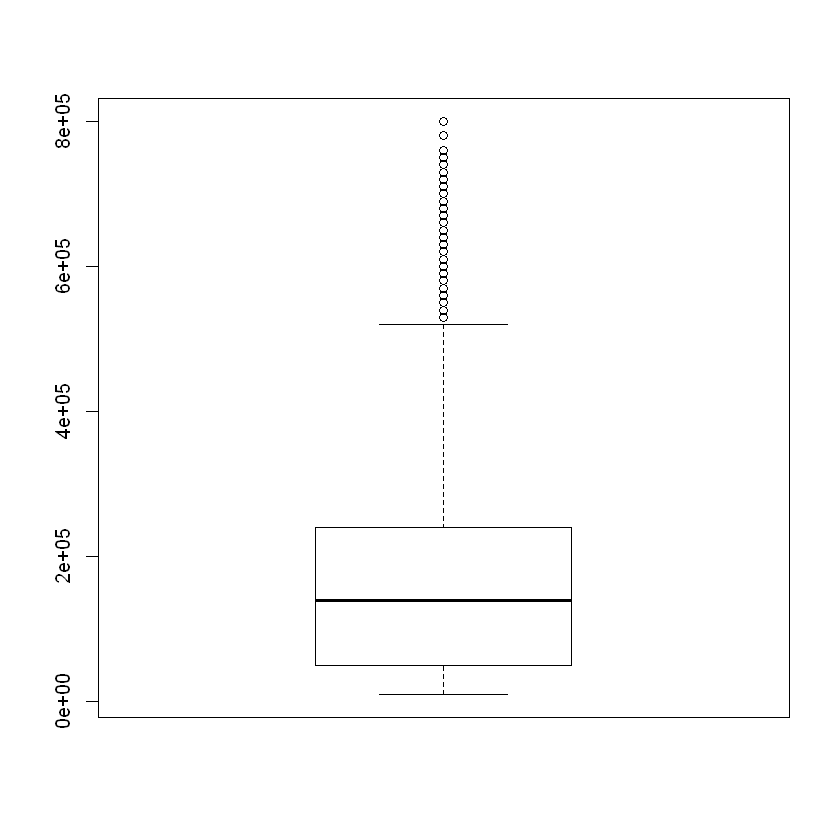

In [25]:
# The outlier needs to be removed

boxplot(data2$LIMIT_BAL)

In [50]:
head(data2,10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
2,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
3,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
8,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
9,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
10,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
11,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


### Change the categorical variable(number form to Female and male type ) in order to understand the visualizition clearly.

In [54]:
data3 <- data2%>%
  dplyr::select( LIMIT_BAL, SEX ,EDUCATION, MARRIAGE ,AGE ,PAY_0 ,PAY_2 ,PAY_3, PAY_4, PAY_5 ,PAY_6,PAY_AMT2, PAY_AMT3 ,PAY_AMT4, PAY_AMT5, PAY_AMT6 ,default_payment,
               BILL_AMT1 ,BILL_AMT2 ,BILL_AMT3, BILL_AMT4 ,BILL_AMT5, BILL_AMT6, PAY_AMT1)

data3$SEX <- dplyr::recode(data2$SEX,"1"="Male", "2"="Female")
data3$EDUCATION <- dplyr::recode(data2$EDUCATION , "1"="graduate school ", "2"="university ","3"="high school","4"="Others")
data3$MARRIAGE <- dplyr::recode(data2$MARRIAGE ,"1"="Married","2"="Single","3"="Others")
data3$default_payment <- dplyr::recode(data2$default_payment,"1"="Default", "0"="Non-Default")

In [29]:
print(data3)

     LIMIT_BAL    SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4
2        20000 Female      university   Married  24     2     2    -1    -1
3       120000 Female      university    Single  26    -1     2     0     0
4        90000 Female      university    Single  34     0     0     0     0
5        50000 Female      university   Married  37     0     0     0     0
6        50000   Male      university   Married  57    -1     0    -1     0
7        50000   Male graduate school    Single  37     0     0     0     0
8       500000   Male graduate school    Single  29     0     0     0     0
9       100000 Female      university    Single  23     0    -1    -1     0
10      140000 Female      high school  Married  28     0     0     2     0
11       20000   Male      high school   Single  35    -2    -2    -2    -2
12      200000 Female      high school   Single  34     0     0     2     0
13      260000 Female graduate school    Single  51    -1    -1    -1    -1
14      6300

In [30]:
## make a visualization to get the understanding about: which group of age people have more default payment--can be checked through calculation proportion

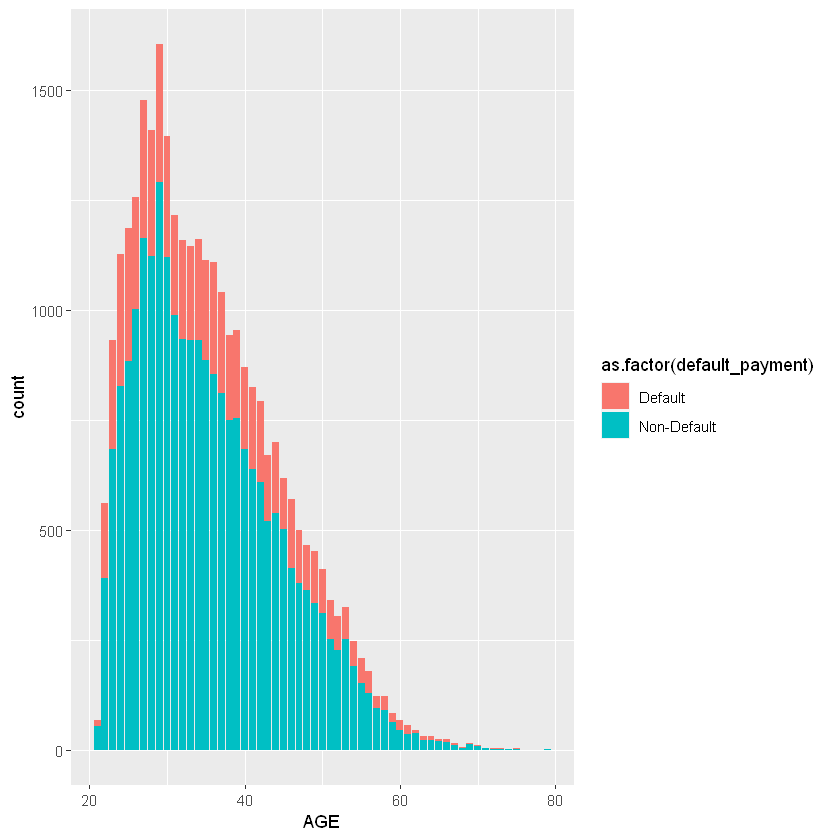

In [31]:
ggplot(data = data3)+geom_bar(aes(x=AGE,fill=as.factor(default_payment)))

In [32]:
table(data3$default_payment,data3$AGE)

             
                21   22   23   24   25   26   27   28   29   30   31   32   33
  Default       14  169  247  300  302  253  313  286  313  274  229  225  215
  Non-Default   53  391  684  827  884 1003 1164 1123 1292 1121  988  933  931
             
                34   35   36   37   38   39   40   41   42   43   44   45   46
  Default      231  226  254  229  194  199  187  185  185  150  162  116  157
  Non-Default  931  887  854  812  750  755  683  639  609  520  538  501  413
             
                47   48   49   50   51   52   53   54   55   56   57   58   59
  Default      120  104  119  101   88   78   74   56   57   49   27   31   21
  Non-Default  380  362  333  310  252  226  251  191  152  129   95   91   62
             
                60   61   62   63   64   65   66   67   68   69   70   71   72
  Default       23   21    7    8    9    5    7    5    1    3    2    0    1
  Non-Default   44   35   37   23   22   19   18   11    4   12    8    3  

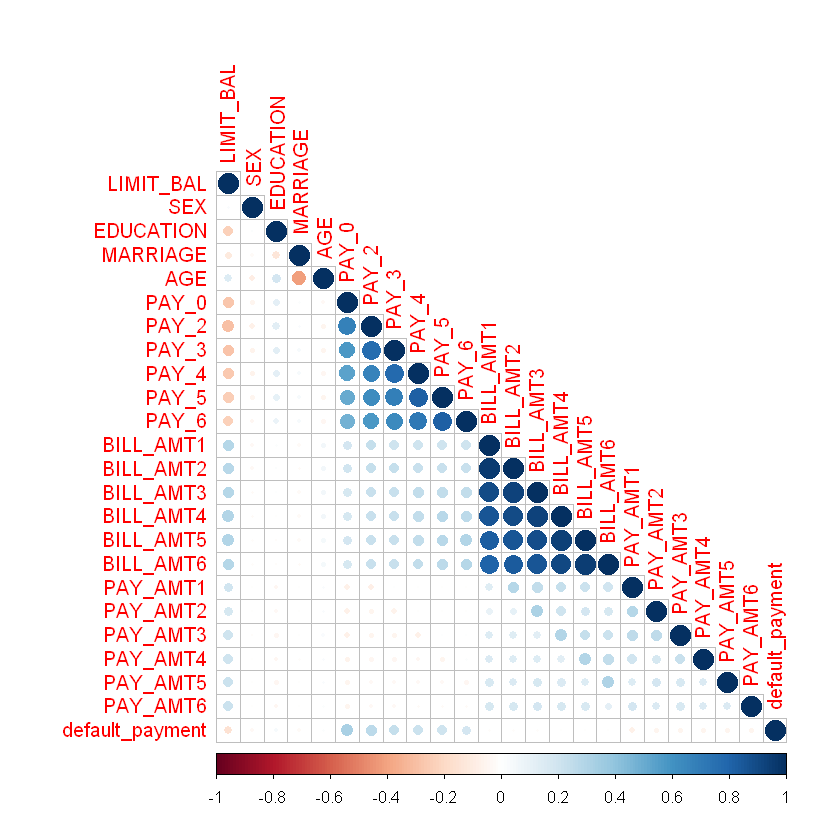

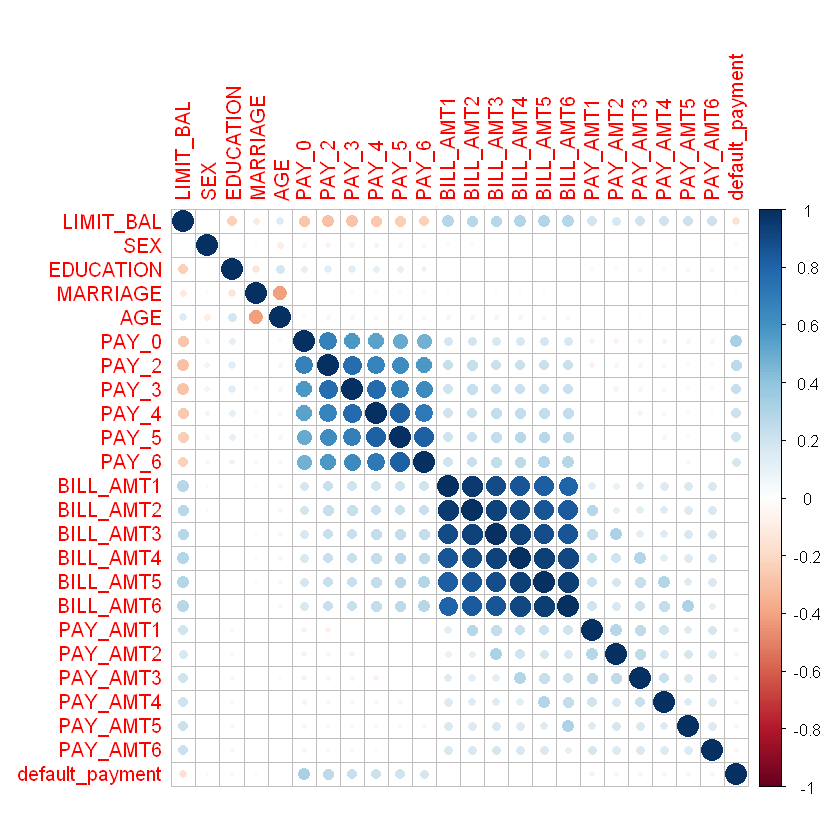

In [55]:
library(corrplot)
cr <- cor(data2)
corrplot(cr,type = "lower")
corrplot(cr) 

### From the scatter plot, we can observe that, middle ones are highly postively correlated and there can be seen a negatively correlation betwn age and marriage

### Corelation between default payments and BILL AMOUNT

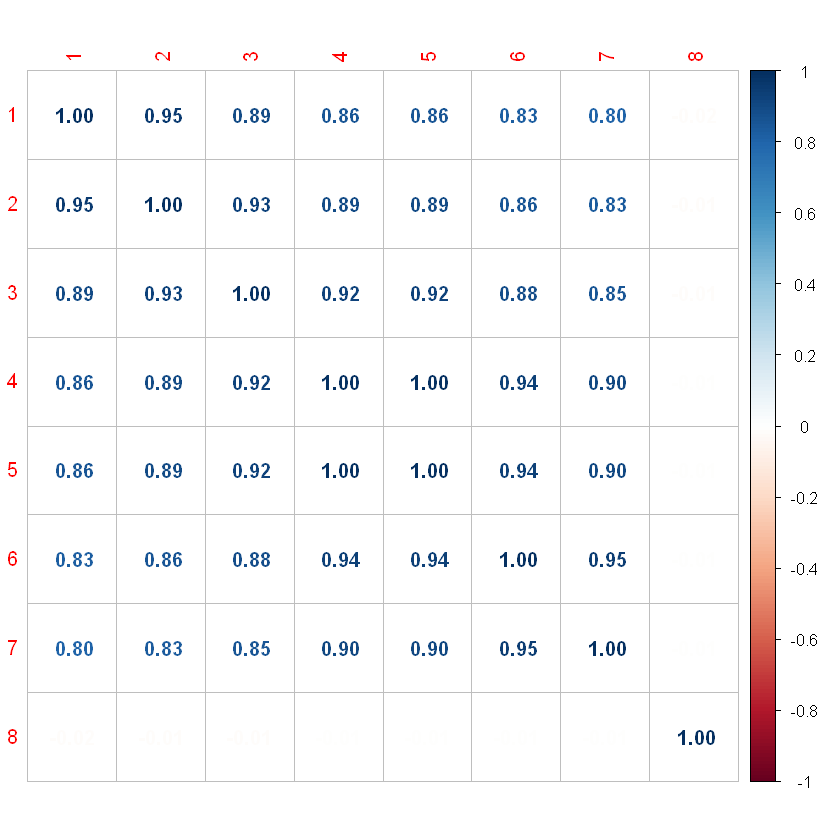

In [56]:
data_billamt <- cbind(data2$BILL_AMT1,data2$BILL_AMT2,data2$BILL_AMT3,data2$BILL_AMT4,data2$BILL_AMT4,data2$BILL_AMT5,data2$BILL_AMT6,data2$default_payment)
cr <- cor(data_billamt)
corrplot(cr,method = "number")

### Corelation between default payments and PAY AMOUNT

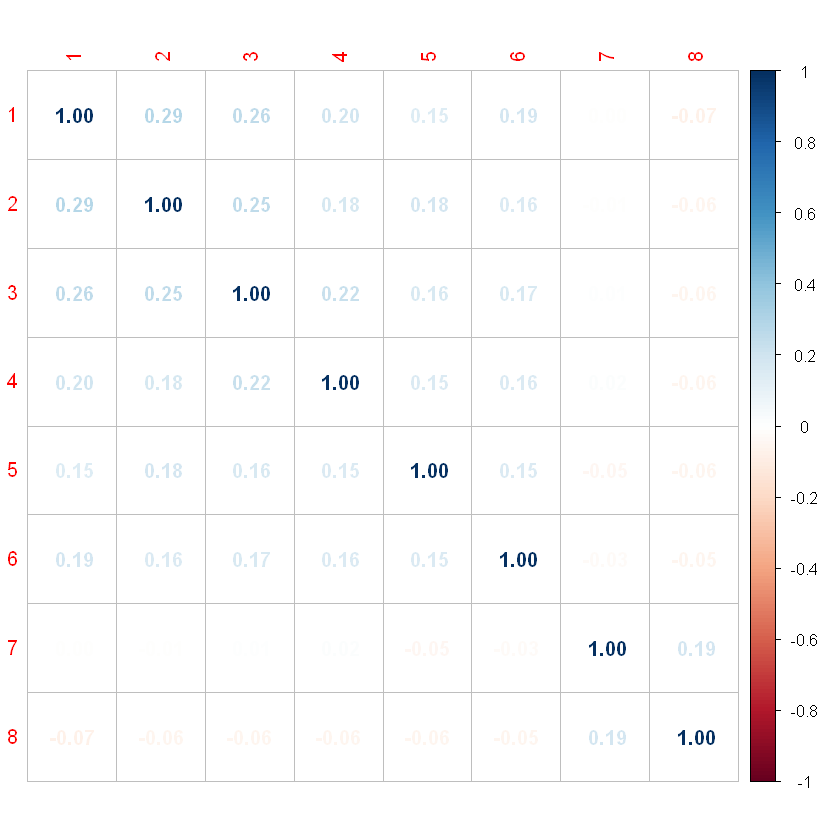

In [57]:
data_payamt <- cbind(data2$PAY_AMT1,data2$PAY_AMT2,data2$PAY_AMT3,data2$PAY_AMT4,data2$PAY_AMT5,data2$PAY_AMT6,data2$PAY_6,data2$default_payment)
cr <- cor(data_payamt)
corrplot(cr,method = "number")

### Corelation between default payments and PAY

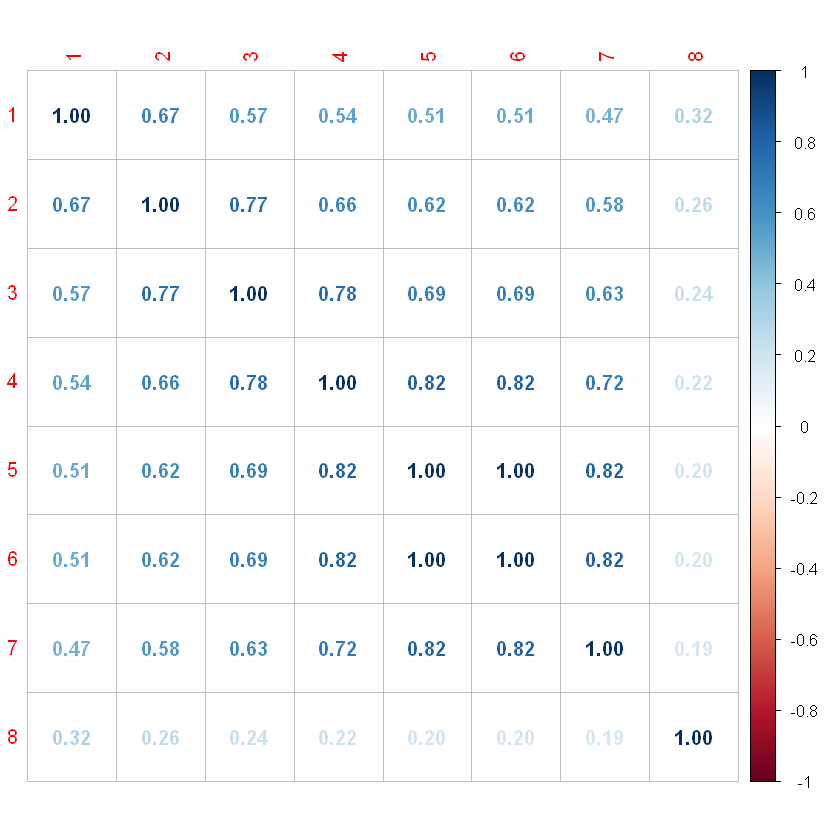

In [58]:
data_pay <- cbind(data2$PAY_0,data2$PAY_2,data2$PAY_3,data2$PAY_4,data2$PAY_5,data2$PAY_5,data2$PAY_6,data2$default_payment)
#library(corrplot)
cr <- cor(data_pay)
corrplot(cr,method = "number")

1) With respect to target variable .i.e. default payment is positively correlated with Pay amount.<br>
2) No Correlation of the amount bill w.r.t target variable could be seen from the corrplot<br>

**We will go into the details and find some more insights in the further process**

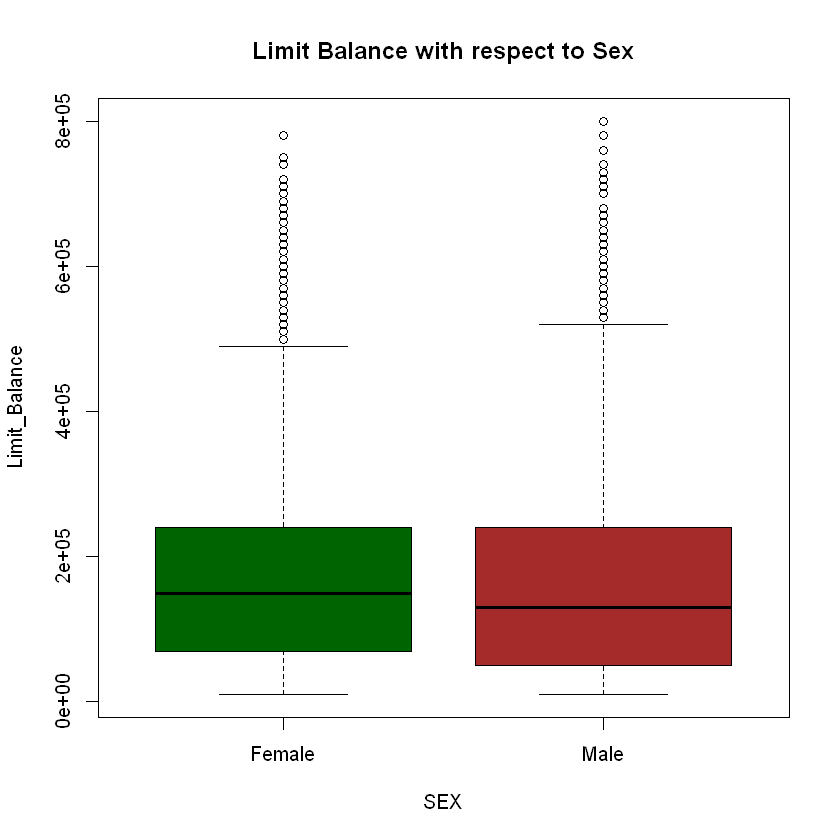

In [59]:
boxplot(LIMIT_BAL~SEX,data3,xlab = "SEX",ylab = "Limit_Balance",main="Limit Balance with respect to Sex",
        col=c("Darkgreen","brown"))

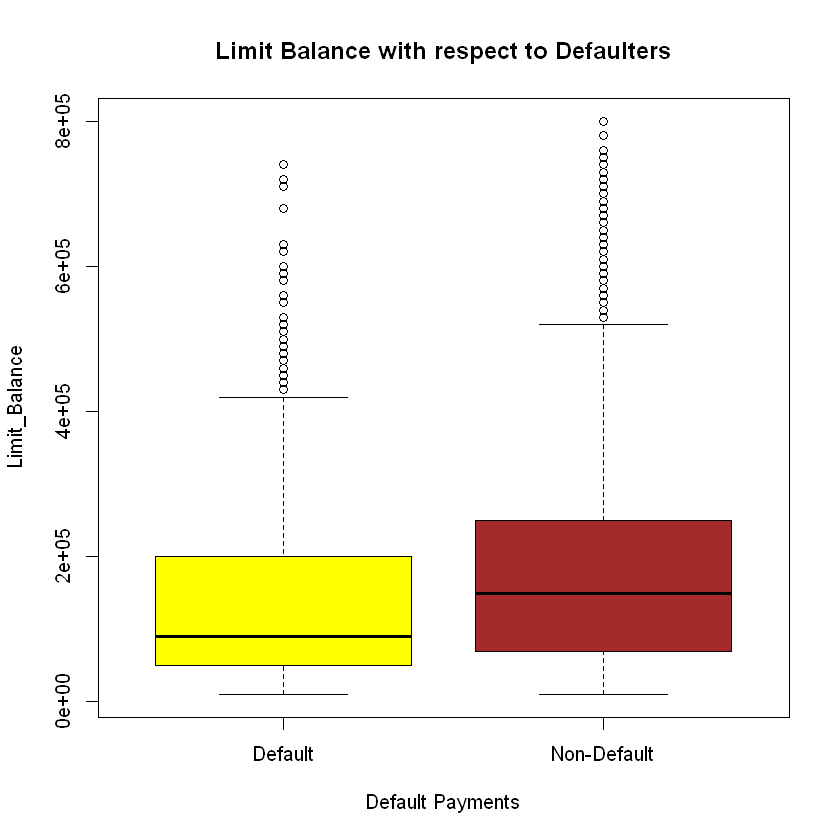

In [67]:
boxplot(LIMIT_BAL~default_payment,data3,xlab = "Default Payments",ylab = "Limit_Balance",main="Limit Balance with respect to Defaulters",
        col=c("Yellow","brown"))

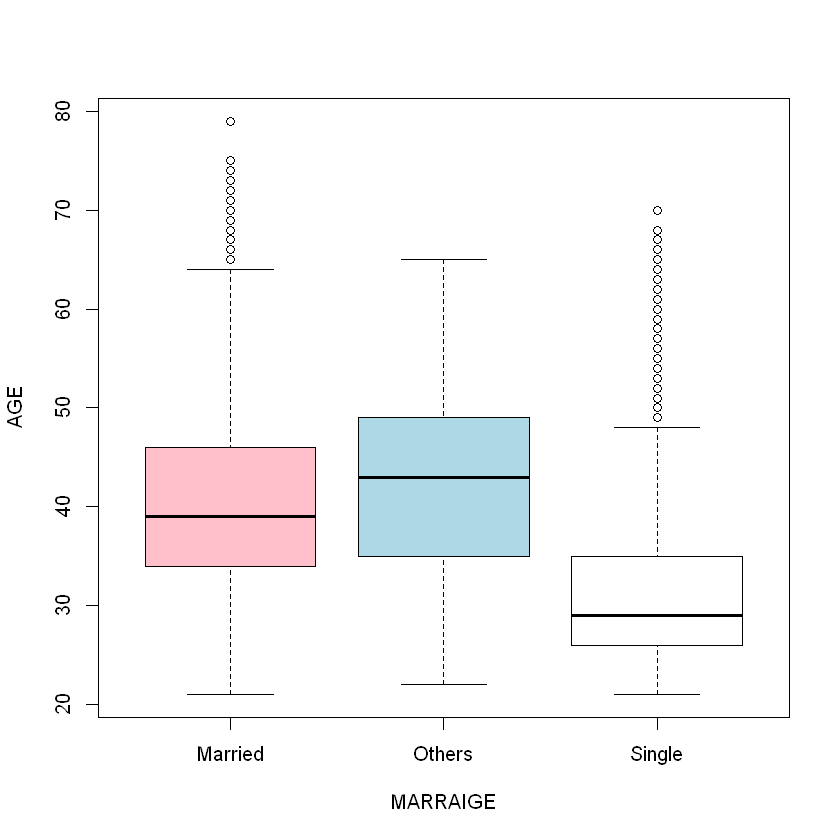

In [60]:
boxplot(AGE~MARRIAGE,data3,xlab = "MARRAIGE",ylab = "AGE",col=c("pink","light blue","white"))

In [40]:
library(ggplot2)

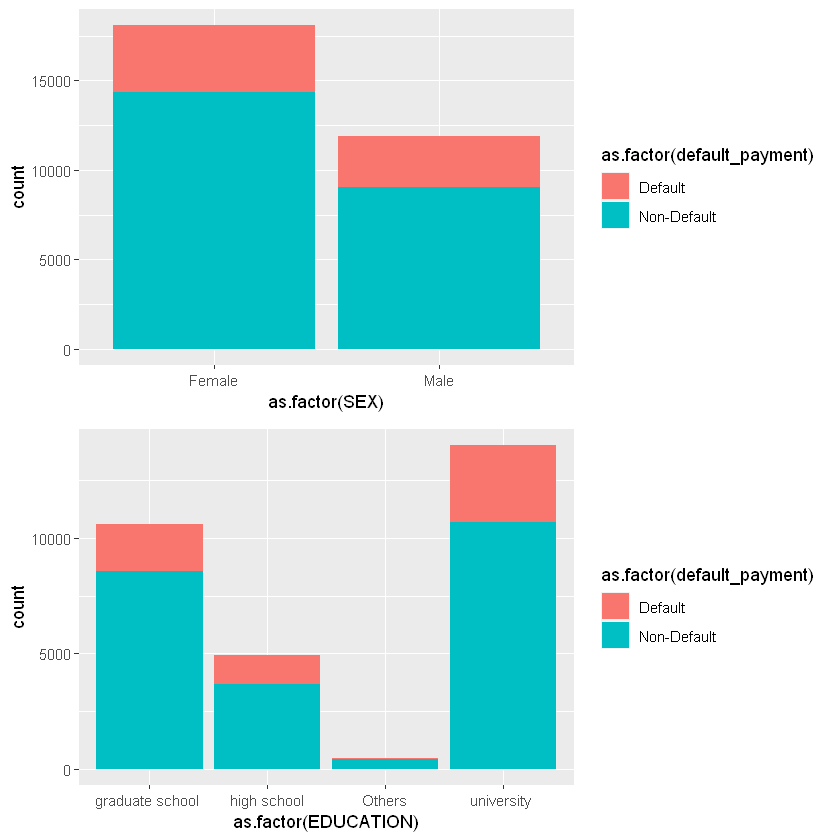

In [61]:
plot1 <- ggplot(data = data3)+geom_bar(aes(x=as.factor(SEX),fill=as.factor(default_payment)))
plot2 <- ggplot(data = data3)+geom_bar(aes(x=as.factor(EDUCATION),fill=as.factor(default_payment)))
plot3 <- ggplot(data = data3)+geom_bar(aes(x=AGE,fill=as.factor(default_payment)))
plot4 <- ggplot(data = data3)+geom_bar(aes(x=LIMIT_BAL,fill=as.factor(default_payment)))

library(gridExtra)
grid.arrange(plot1,plot2)

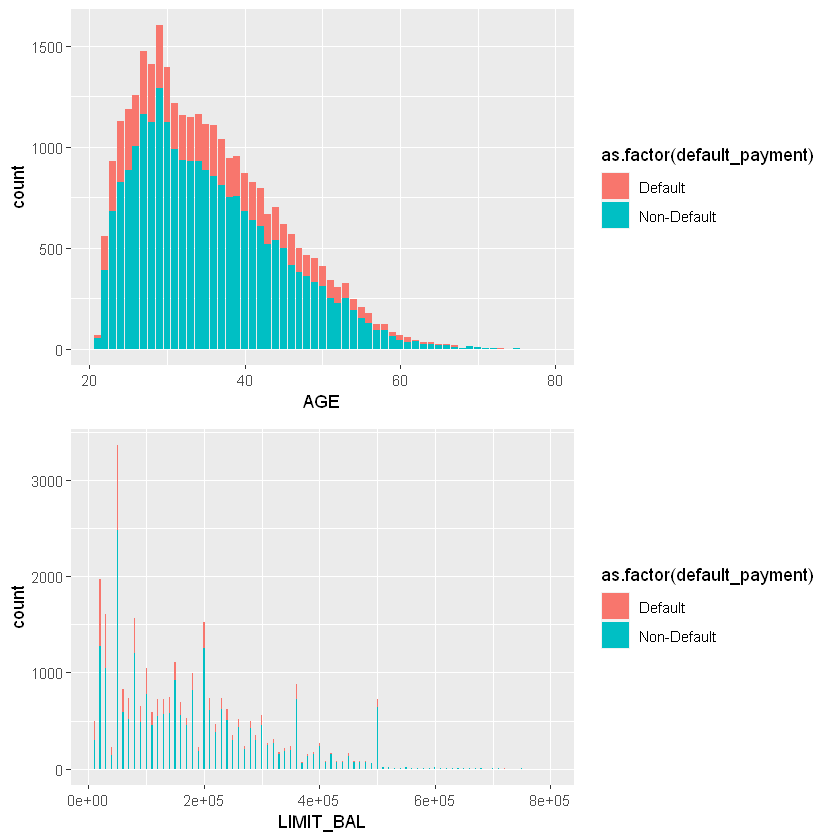

In [42]:
plot3 <- ggplot(data = data3)+geom_bar(aes(x=AGE,fill=as.factor(default_payment)))
plot4 <- ggplot(data = data3)+geom_bar(aes(x=LIMIT_BAL,fill=as.factor(default_payment)))
grid.arrange(plot3,plot4)

1) From the above graphs, we see that more number of males as compare to female are defaulters.<br>
2) Among the graduates, the hightest defaulters were seen in higher school graduates with 25% and 24%, 19% defaults were there in university and graduates students which is in order and valid here.<br>
3) The number of defaults is highest(peak) among the 21-30 age groups, followed by 30-40 and the older age, it decreases.<br>
4) From the box plot and histogram we observe that:- The low is limit balance, the higher is the default numbers.<br>

### data about the default and non default with respect to various categories in the table form

In [63]:
table(data3$default_payment,data3$MARRIAGE)

             
              Married Others Single
  Default        3206     89   3341
  Non-Default   10452    288  12623

In [44]:
table(data3$default_payment,data3$SEX)

             
              Female  Male
  Default       3763  2873
  Non-Default  14348  9015

In [62]:
table(data3$default_payment,data3$EDUCATION)

             
              graduate school  high school Others university 
  Default                 2036        1237     33        3330
  Non-Default             8548        3680    435       10700

In [64]:
table(data3$default_payment,data3$LIMIT_BAL)

             
              10000 16000 20000 30000 40000 50000 60000 70000 80000 90000 1e+05
  Default       197     0   698   568    92   885   233   210   363   166   272
  Non-Default   296     2  1278  1042   138  2480   592   521  1204   485   776
             
              110000 120000 130000 140000 150000 160000 170000 180000 190000
  Default        132    179    157    170    187    137     78    176     49
  Non-Default    456    547    572    579    923    557    454    819    180
             
              2e+05 210000 220000 230000 240000 250000 260000 270000 280000
  Default       270    117     89    113    110     51     87     28     69
  Non-Default  1258    613    380    624    509    299    434    210    424
             
              290000 3e+05 310000 320000 327680 330000 340000 350000 360000
  Default         53    95     27     44      1     21     32     32    154
  Non-Default    295   459    245    268      0    152    185    199    727
             
   

In [45]:
table(data3$default_payment,data3$AGE)

             
                21   22   23   24   25   26   27   28   29   30   31   32   33
  Default       14  169  247  300  302  253  313  286  313  274  229  225  215
  Non-Default   53  391  684  827  884 1003 1164 1123 1292 1121  988  933  931
             
                34   35   36   37   38   39   40   41   42   43   44   45   46
  Default      231  226  254  229  194  199  187  185  185  150  162  116  157
  Non-Default  931  887  854  812  750  755  683  639  609  520  538  501  413
             
                47   48   49   50   51   52   53   54   55   56   57   58   59
  Default      120  104  119  101   88   78   74   56   57   49   27   31   21
  Non-Default  380  362  333  310  252  226  251  191  152  129   95   91   62
             
                60   61   62   63   64   65   66   67   68   69   70   71   72
  Default       23   21    7    8    9    5    7    5    1    3    2    0    1
  Non-Default   44   35   37   23   22   19   18   11    4   12    8    3  

In [46]:
prop.table(table(data$default_payment))


     0      1 
0.7788 0.2212 

### The data is highly imbalance. We will handle this in the next coming Process(Part 2).

In [48]:
#delay payemnt trend graph

In [49]:
#ggplot(data3, aes(x= y=data_pay)) +
 # geom_line( color="#69b3a2", size=2, alpha=0.9, linetype=2) +
  #theme_ipsum() +
  #ggtitle("Evolution of something")